<a href="https://www.kaggle.com/code/aaradhyakulkarni/3-1-mnist-classifier?scriptVersionId=209172989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Setup

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import sklearn

sklearn.__version__

'1.2.2'

In [32]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import precision_score, recall_score , accuracy_score

In [5]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [7]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [38]:
import warnings 
warnings.filterwarnings('ignore')

import pickle

In [18]:
np.random.seed(42)

# Problem Statement 1

Try to build a classifier for the MNIST dataset that achieves over 97%
accuracy on the test set. Hint: the KNeighborsClassifier works quite well
for this task; you just need to find good hyperparameter values (try a
grid search on the weights and n_neighbors hyperparameters).

# Dataloading

In [10]:
from sklearn.datasets import fetch_openml

In [12]:
mnist = fetch_openml(data_id = 554, as_frame = False)

mnist.keys()

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [20]:
def plot_images(image, cmap='binary'):
    image_data = image.reshape(28,28)
    plt.imshow(image_data, cmap = cmap)
    plt.axis('off')

In [21]:
X = mnist.data
y = mnist.target

print(f'Feature matrix : {X.shape}')
print(f'Target matrix  : {y.shape}')

Feature matrix : (70000, 784)
Target matrix  : (70000,)


In [23]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size =1/7 )

print(f'X_train: {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train: (60000, 784)
X_test : (10000, 784)
y_train: (60000,)
y_test : (10000,)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# lets check accuracy with default setting

In [31]:
knn1 = KNeighborsClassifier()

knn1.fit(X_train,y_train)

accuracy_score(y_test, knn1.predict(X_test))


0.9696

We are very close to 0.97

now lets try param_grid

In [35]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [37]:
# parameters to tune : 
# n_neighbors : default = 5, lets see first range 1 to 10
# weights = {'uniform',distance}

n_range = range(1,11)
accuracy_scores = []
precision_scores = []
recall_scores = []


for k in n_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))

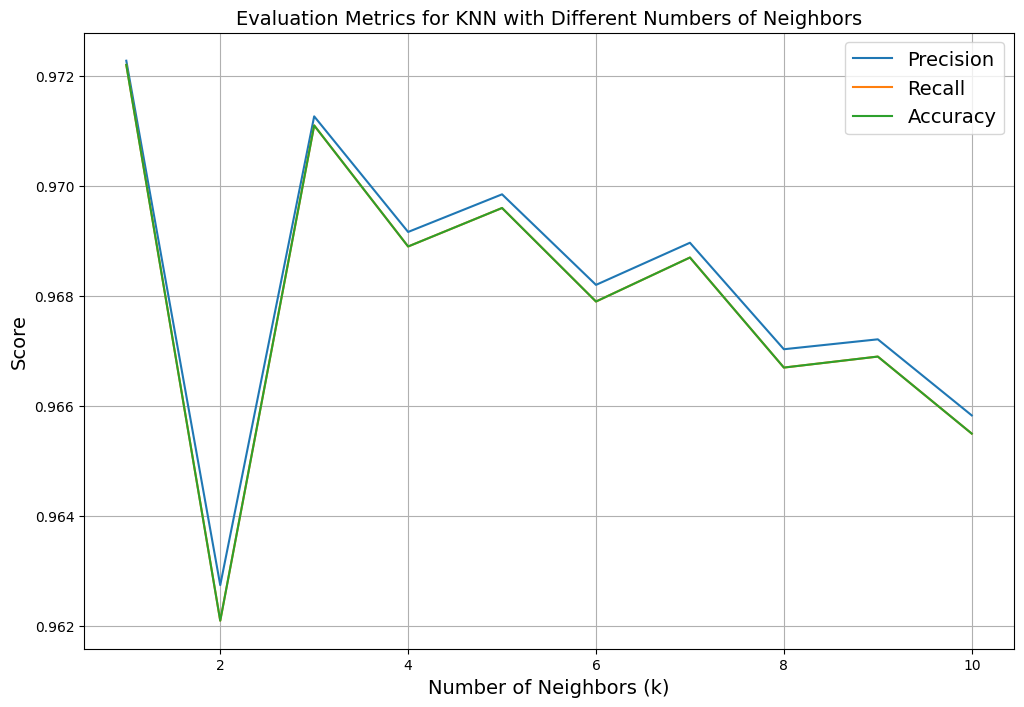

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(n_range, precision_scores, label='Precision')
plt.plot(n_range, recall_scores, label='Recall')
plt.plot(n_range, accuracy_scores, label='Accuracy')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Evaluation Metrics for KNN with Different Numbers of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
for i in range(len(recall_scores)):
    print(precision_scores[i].round(2) == recall_scores[i].round(2))

True
True
True
True
True
True
True
True
True
True


precision and recall are same  for this 

In [52]:
param_grid = {
    'weights' : ['uniform','distance'],
    'n_neighbors' : [3,4,5]
}

cv = GridSearchCV(knn1, param_grid = param_grid, cv = 3)
cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [53]:
cv.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [56]:
knn_final = cv.best_estimator_ 

accuracy_score(y_test, knn_final.predict(X_test))

0.9729

Yeyyy we passed 0.97 